# MNIST Dataset
## digit_detection

https://www.youtube.com/watch?v=E_ZvKXTXmi4&list=PLs74m7pSWiuuc0e4diBN-b1o5gX8ucaiW&index=9

In [2]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [3]:
mnist = keras.datasets.mnist

In [4]:
(train_featurs, train_labels), (test_featurs, test_labels) = mnist.load_data()

In [5]:
train_featurs.shape

(60000, 28, 28)

In [6]:
test_featurs.shape

(10000, 28, 28)

7


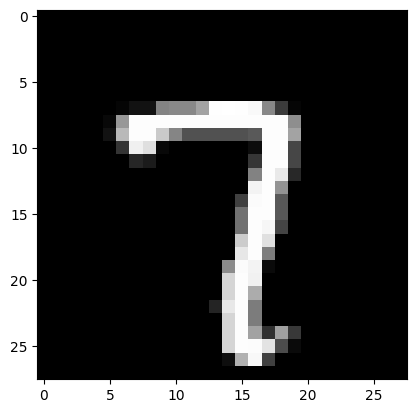

In [7]:
idx = 2024
img = train_featurs[idx]

print(train_labels[idx])

plt.gray()
plt.imshow(img)

In [8]:
np.min(img), np.max(img)

(0, 255)

In [9]:
train_featurs = train_featurs / 255.0
test_featurs = test_featurs / 255.0

# model definition

In [10]:
model = keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dense(units = 10, activation = 'softmax'))

In [11]:
model.compile(optimizer=tf.optimizers.Adam(), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [12]:
model.build(input_shape = (None, 28,28))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
hist = model.fit(train_featurs,train_labels, epochs = 300, batch_size = 256, validation_data = (test_featurs, test_labels))

KeyboardInterrupt: 

In [ ]:
model.evaluate(test_featurs, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9765 - loss: 0.2944


[0.24438251554965973, 0.9797999858856201]

In [ ]:
idx = 100
img = test_featurs[idx]
print(test_labels[idx])

6


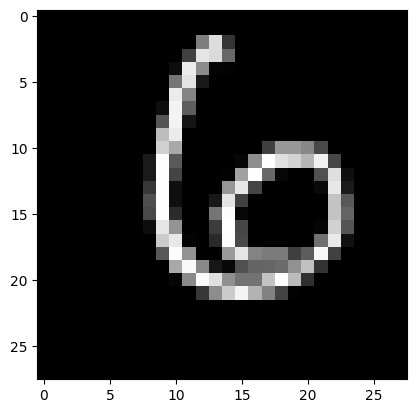

In [ ]:
plt.gray()
plt.imshow(img)

In [ ]:
#test_data = np.reshape(img, (-1, 784))
test_data = np.reshape(img, (1, 28, 28))

test_data.shape

(1, 28, 28)

In [ ]:
model.predict(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


array([[4.7502975e-25, 3.9052623e-28, 2.6578871e-30, 0.0000000e+00,
        1.4568090e-36, 2.7843455e-24, 1.0000000e+00, 1.4664129e-32,
        2.8860177e-26, 0.0000000e+00]], dtype=float32)

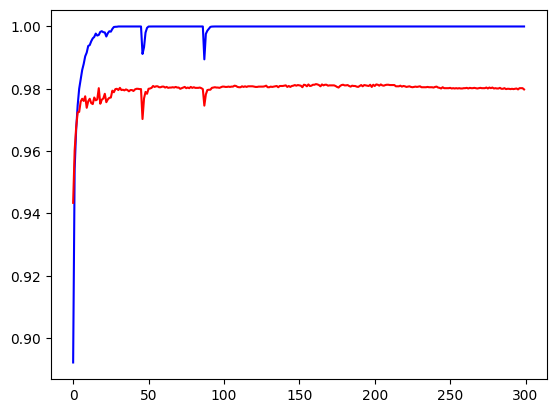

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

plt.plot(acc, color = 'blue')
plt.plot(val_acc, color = 'red')

In [ ]:
acc = hist.history['loss']
val_acc = hist.history['val_loss']

plt.plot(acc, color = 'blue')
plt.plot(val_acc, color = 'red')

NameError: name 'hist' is not defined